<a href="https://colab.research.google.com/github/Sheila-otuko/machine_learning_practice/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/3.01. Country clusters.csv'
data = pd.read_csv(path)


In [6]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(*args, **kw)>

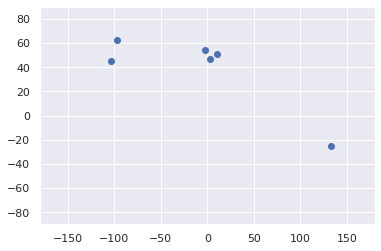

In [7]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

In [8]:
x = data.iloc[:,1 : 3]

#iloc slices the data frame given the rows and columns to be kept
#DataFrame.iloc(row indices, column indices)


In [9]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [16]:
kmeans = KMeans(3)
#the number in brackets is the number of clusters we want to produce

In [17]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [18]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [19]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(*args, **kw)>

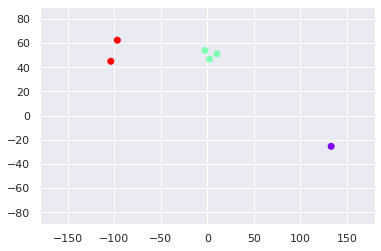

In [20]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

map the data

In [22]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English' :0, 'French' :1, 'German' :2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


select features

In [32]:
x = data_mapped.iloc[:, 1:4 ]

In [33]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


clustering

In [39]:
kmeans = KMeans(2)

In [40]:
kmeans.fit(x)

KMeans(n_clusters=2)

clustering results

In [41]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [42]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


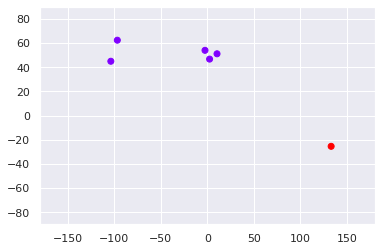

In [43]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c= data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

**THE ELBOW METHOD**

*Within Cluster Sum of Squares (WCSS)*

Should be low with the smallest number of clusters

Selecting the number of clusters 

**WCSS**

In [44]:
kmeans.inertia_

#gives the WCSS

13208.958119999996

In [45]:
wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [46]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

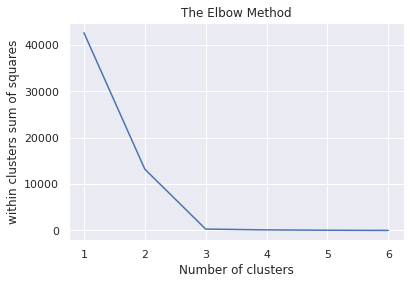

In [48]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within clusters sum of squares')
plt.show()

#the optimal value is 3 since there is no significant increase in the wcss after it

**Pros and cons of kmeans clustering**

*Pros*

simple to understand
faster to cluster
widely available
easy to implement
alawys yields a result 

*Cons and solutions*
we need to pick k - the elbow method
sensitive to initialization - k-means++
sensitive to outliers - remove outliers 
produces spherical solutions - 
standardization

